In [81]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys

PRE PROCESSING DATA

In [27]:
df=pd.read_csv("ecommerce_customer_data - ecommerce_customer_data.csv.csv")
#dropping unecessary cols
df=df.drop(columns=["CustomerServiceInteractions","CustomerID","RepeatCustomer","PremiumMember","HasReturnedItems","RegistrationDate","SocialMediaEngagementRate","EmailEngagementRate","MobileAppUsage","TotalPurchases","CustomerLifetimeValue"])
#dropping null rows of cols
df = df.dropna(subset=["Age","IncomeLevel","Gender","SecondFavoriteCategory","FavoriteCategory","Country","City"])

#filling cols with mean of col
df["AverageSatisfactionScore"]=df["AverageSatisfactionScore"].fillna(df["AverageSatisfactionScore"].mean())
df["SocialMediaConversionRate"]=df["SocialMediaConversionRate"].fillna(df["SocialMediaConversionRate"].mean())
df["SearchEngineConversionRate"]=df["SearchEngineConversionRate"].fillna(df["SearchEngineConversionRate"].mean())
df["AverageOrderValue"]=df["AverageOrderValue"].fillna(df["AverageOrderValue"].mean())
df["EmailConversionRate"]=df["EmailConversionRate"].fillna(df["EmailConversionRate"].mean())

#converting text into numbers for faster calcutions by the algorithm
df['IncomeLevel'] = df['IncomeLevel'].replace({
    'High': 0.5,
    'Very High': 1,
    'Medium': 0,
    "Low": -1,
})
df["Gender"] = df["Gender"].replace({
    "Female":-1,
    "Male" : 1,
})
#removing neg ages
df = df[df['Age'] >= 0]

df['Gender'] = df['Gender'].apply(lambda x: 0 if isinstance(x, str) else x)

#Convert categorical variables to numerical using LabelEncoder
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['City'] = le.fit_transform(df['City'])
df['FavoriteCategory'] = le.fit_transform(df['FavoriteCategory'])
df['SecondFavoriteCategory'] = le.fit_transform(df['SecondFavoriteCategory'])

print(df['FavoriteCategory'].value_counts())

df.head(100)








FavoriteCategory
6    445
4    439
0    429
2    419
5    412
7    406
3    405
1    391
Name: count, dtype: int64


C:\Users\moksh\AppData\Local\Temp\ipykernel_21956\1708714090.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['IncomeLevel'] = df['IncomeLevel'].replace({


,Age,Gender,IncomeLevel,Country,City,AverageOrderValue,FavoriteCategory,SecondFavoriteCategory,AverageSatisfactionScore,EmailConversionRate,SocialMediaConversionRate,SearchEngineConversionRate
3,49.0,-1,0.5,0,2,14.194263,6,2,7.829459,0.074097,0.206644,0.281067
4,29.0,-1,1.0,0,7,31147.427210,2,0,7.777353,0.163438,0.232410,0.326645
5,57.0,1,-1.0,7,6,18.985495,6,7,4.059194,0.107597,0.320741,0.317217
7,57.0,0,0.0,3,0,49.184462,5,7,8.718547,0.196052,0.449774,0.148401
8,43.0,0,0.5,1,3,199.163799,3,6,6.978439,0.055744,0.207492,0.192226
...,...,...,...,...,...,...,...,...,...,...,...,...
280,38.0,1,-1.0,3,0,18.732328,1,7,9.280516,0.138332,0.074530,0.122609
284,21.0,0,0.5,3,4,68.362884,4,1,5.561957,0.163757,0.199088,0.048747
285,12.0,0,1.0,5,5,142.252176,1,6,7.156555,0.185272,0.199088,0.305336
287,17.0,0,-1.0,3,2,48.266013,7,7,5.552240,0.445627,0.199088,0.061444


DB SCAN

Finding optimal parameters...
eps=1.4, min_samples=4: 45 clusters, 47.31% noise

Best parameters found:
eps: 1.4
min_samples: 4

Clustering Results:
Number of clusters: 45
Number of noise points: 1583
Noise ratio: 47.31%
Silhouette Score: -0.13554575106089747

Cluster Characteristics:

Cluster 0:
Size: 868
Most common favorite category: Beauty
Most common second favorite category: Sports

Cluster 1:
Size: 6
Most common favorite category: Beauty
Most common second favorite category: Food

Cluster 2:
Size: 203
Most common favorite category: Food
Most common second favorite category: Home Goods

Cluster 3:
Size: 256
Most common favorite category: Sports
Most common second favorite category: Food

Cluster 4:
Size: 59
Most common favorite category: Food
Most common second favorite category: Clothing

Cluster 5:
Size: 9
Most common favorite category: Home Goods
Most common second favorite category: Clothing

Cluster 6:
Size: 67
Most common favorite category: Toys
Most common second favorite 

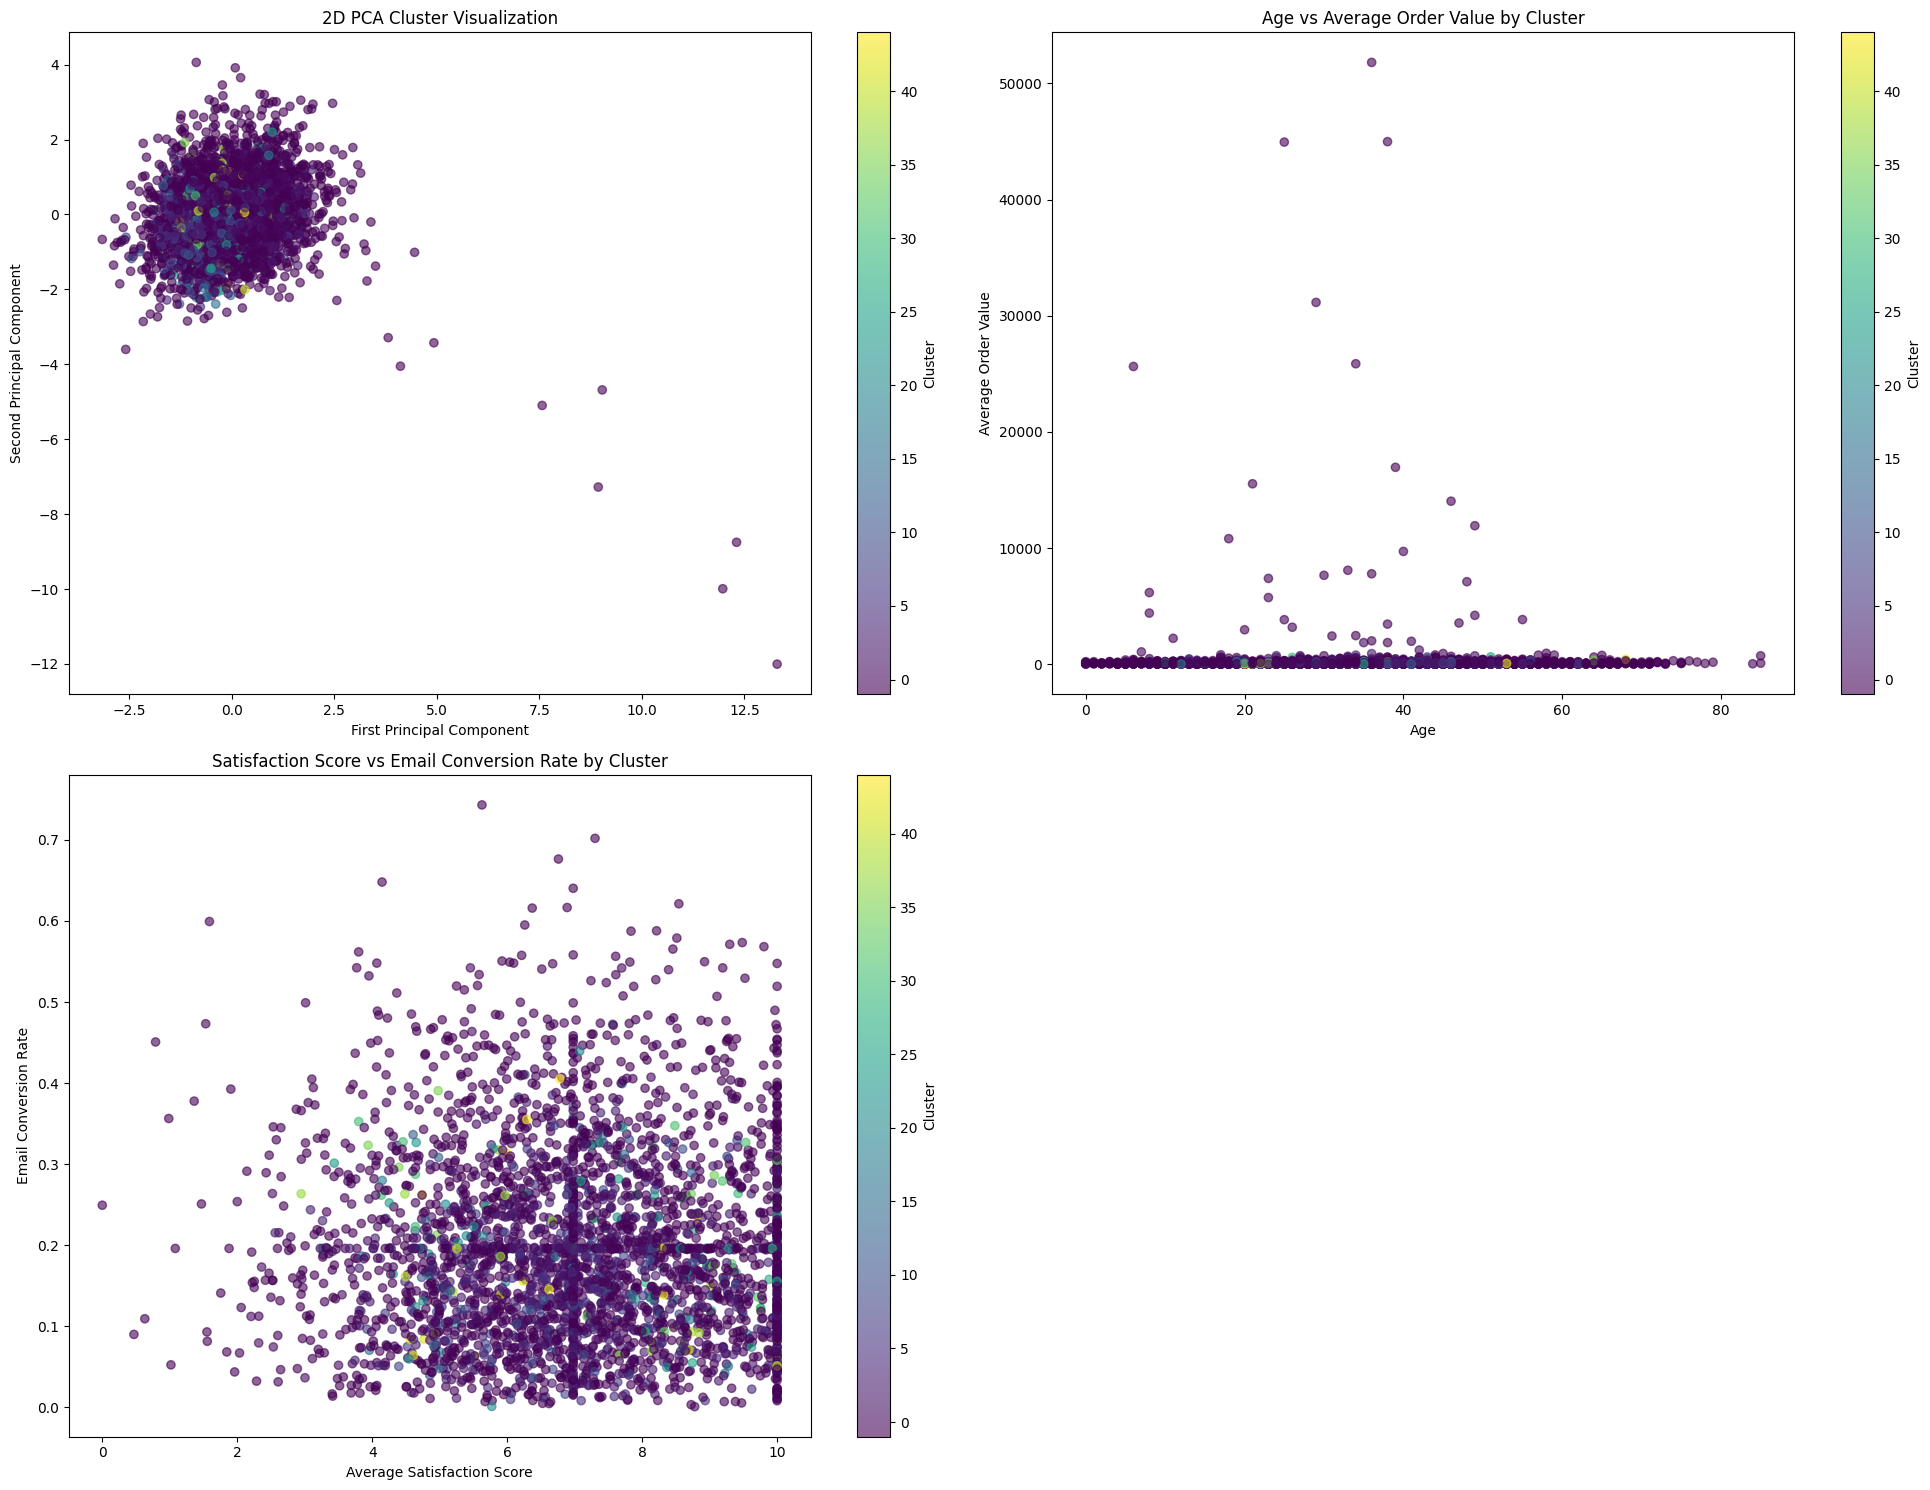

Predicted cluster for user: 0
Cluster 0: Favorite Category = Beauty, Second Favorite Category = Sports
Predicted favorite category: Beauty
Predicted second favorite category: Sports


In [31]:
# Select features for clustering
features = ['Age', 'IncomeLevel', 'Gender', 'Country', 'City', 
           'AverageOrderValue', 'AverageSatisfactionScore',
           'EmailConversionRate', 'SocialMediaConversionRate', 
           'SearchEngineConversionRate']

# Prepare the data for clustering
X = df[features].values

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler


eps_values = [1.4]
min_samples_values = [4]

best_eps = None
best_min_samples = None
best_n_clusters = -1
best_noise_ratio = 1.0

# Find best parameters
print("Finding optimal parameters...")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_scaled)
        
        n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
        noise_ratio = list(clusters).count(-1) / len(clusters)
        
        print(f"eps={eps}, min_samples={min_samples}: {n_clusters} clusters, {noise_ratio:.2%} noise")
        
        # We want a reasonable number of clusters and not too many noise points
        if n_clusters > 0 and noise_ratio < 0.5:
            if best_n_clusters == -1 or (noise_ratio < best_noise_ratio and n_clusters > 1):
                best_eps = eps
                best_min_samples = min_samples
                best_n_clusters = n_clusters
                best_noise_ratio = noise_ratio

print(f"\nBest parameters found:")
print(f"eps: {best_eps}")
print(f"min_samples: {best_min_samples}")

# Perform DBSCAN clustering with best parameters
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters

# Print clustering statistics
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)
print(f"\nClustering Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise}")
print(f"Noise ratio: {n_noise/len(clusters):.2%}")

# Calculate silhouette score if we have valid clusters
if n_clusters > 1:
    mask = clusters != -1
    if sum(mask) > 1:
        silhouette_avg = metrics.silhouette_score(X_scaled[mask], clusters[mask])
        print(f"Silhouette Score: {silhouette_avg}")

# Create dictionaries to store category preferences by cluster
cluster_favorite = {}
cluster_second_favorite = {}

# For each cluster, find the most common categories
for cluster in np.unique(clusters):
    if cluster == -1:  # Skip noise points
        continue
    
    cluster_data = df[df['Cluster'] == cluster]
    
    if len(cluster_data) > 0:
        # Get most common favorite category
        fav_category = cluster_data['FavoriteCategory'].mode()[0]
        cluster_favorite[cluster] = fav_category
        
        # Get most common second favorite category
        second_fav = cluster_data['SecondFavoriteCategory'].mode()[0]
        cluster_second_favorite[cluster] = second_fav

# Print cluster characteristics
print("\nCluster Characteristics:")
for cluster in range(n_clusters):
    if cluster in cluster_favorite:
        cluster_data = df[df['Cluster'] == cluster]
        print(f"\nCluster {cluster}:")
        print(f"Size: {len(cluster_data)}")
        print(f"Most common favorite category: {le.inverse_transform([cluster_favorite[cluster]])[0]}")
        print(f"Most common second favorite category: {le.inverse_transform([cluster_second_favorite[cluster]])[0]}")

# Create visualizations
plt.figure(figsize=(20, 15))

# 1. PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 2D PCA Plot
plt.subplot(2, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title('2D PCA Cluster Visualization')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(scatter, label='Cluster')

# Age vs AverageOrderValue scatter plot
plt.subplot(2, 2, 2)
scatter_age = plt.scatter(df['Age'], df['AverageOrderValue'], c=clusters, cmap='viridis', alpha=0.6)
plt.title('Age vs Average Order Value by Cluster')
plt.xlabel('Age')
plt.ylabel('Average Order Value')
plt.colorbar(scatter_age, label='Cluster')

# Satisfaction vs EmailConversionRate scatter
plt.subplot(2, 2, 3)
scatter_satisfaction = plt.scatter(df['AverageSatisfactionScore'], 
                                 df['EmailConversionRate'],
                                 c=clusters, cmap='viridis', alpha=0.6)
plt.title('Satisfaction Score vs Email Conversion Rate by Cluster')
plt.xlabel('Average Satisfaction Score')
plt.ylabel('Email Conversion Rate')
plt.colorbar(scatter_satisfaction, label='Cluster')

plt.tight_layout()
plt.show()

# Function to predict categories f
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Assuming you have already fitted DBSCAN on the training data (X_scaled)
# And the scaler and cluster mappings (cluster_favorite, cluster_second_favorite) are available

def predict_categories(user_data, scaler, dbscan, le, cluster_favorite, cluster_second_favorite):
    """
    Predict favorite and second favorite categories for a new user.
    user_data should be a dictionary with the same features used in clustering.
    """
    try:
        # If country_encoder is provided, transform the country, else use the given numeric value
        country_code = user_data['Country']  # Assuming numeric value
        city_code = user_data['City']  # Assuming numeric value

        # Prepare the user features
        user_features = np.array([[
            user_data['Age'],
            user_data['IncomeLevel'],
            user_data['Gender'],
            country_code,
            city_code,
            user_data['AverageOrderValue'],
            user_data['AverageSatisfactionScore'],
            user_data['EmailConversionRate'],
            user_data['SocialMediaConversionRate'],
            user_data['SearchEngineConversionRate']
        ]])

        # Scale the features
        user_scaled = scaler.transform(user_features)

        # Predict the cluster (check the closest cluster in the already fitted model)
        cluster = dbscan.labels_[dbscan.fit_predict(user_scaled)[0]]
        print(f"Predicted cluster for user: {cluster}")

        if cluster == -1:
            print("User is classified as noise (cluster = -1). Returning 'Unknown'.")
            return "Unknown", "Unknown"

        if cluster not in cluster_favorite:
            print(f"Cluster {cluster} does not have a favorite category. Returning 'Unknown'.")
            return "Unknown", "Unknown"

        # Get the original category labels
        fav_category = le.inverse_transform([cluster_favorite.get(cluster, -1)])[0]
        second_fav = le.inverse_transform([cluster_second_favorite.get(cluster, -1)])[0]

        # Debug: Check if the categories are found
        print(f"Cluster {cluster}: Favorite Category = {fav_category}, Second Favorite Category = {second_fav}")

        if fav_category == -1 or second_fav == -1:
            print(f"Could not find valid categories for cluster {cluster}. Returning 'Unknown'.")
            return "Unknown", "Unknown"
        
        return fav_category, second_fav
    
    except Exception as e:
        print(f"Error during prediction: {str(e)}")
        return "Unknown", "Unknown"


# Example user data (encoded values directly passed)
# example_user_3 = {
#     'Age': 57.0,
#     'IncomeLevel': -1.0,  # Low income level (encoded as -1)
#     'Gender': 7,  # Example gender encoded value
#     'Country': 6,  # Example country encoded value
#     'City': 7,  # Example city encoded value
#     'AverageOrderValue': 18.99,
#     'AverageSatisfactionScore': 4.06,
#     'EmailConversionRate': 0.107,
#     'SocialMediaConversionRate': 0.321,
#     'SearchEngineConversionRate': 0.317
# }
example_user_3 = {
    'Age': 41.0,
    'IncomeLevel': 1,  # Very High income level (encoded as 1)
    'Gender': 1,  # Male (encoded as 1)
    'Country': 0,  # Example country encoded value
    'City': 4,  # Example city encoded value
    'AverageOrderValue': 120.75,
    'AverageSatisfactionScore': 4.95,
    'EmailConversionRate': 0.30,
    'SocialMediaConversionRate': 0.25,
    'SearchEngineConversionRate': 0.40
}




# Call the predict_categories function without encoding
fav_category, second_fav = predict_categories(example_user_3, scaler, dbscan, le, cluster_favorite, cluster_second_favorite)

# Print the results
print(f"Predicted favorite category: {fav_category}")
print(f"Predicted second favorite category: {second_fav}")

